A part of the code of this program is referenced from below:

Sharma, E, Altuve, D, Jansen, K (2020) Myers Briggs Personality Prediction [Source code]. https://github.com/esharma3/myers-briggs-personality-prediction

In [4]:
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 4.8 MB/s 


### Import and initialize variable



In [5]:
import pandas as pd
import re
import string
import numpy as np
import collections 
from statistics import mean
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

#Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from nltk import wordnet
import nlpaug
import nlpaug.augmenter.word as naw
import matplotlib.pyplot as plt
import seaborn as sns
import math

#Performance check
import time 
import warnings

warnings.filterwarnings("ignore")

#
    
#Saving the model
from joblib import dump, load
import pickle

mbti_type = {
    "is_Extrovert": "Extrovert vs Introvert",
    "is_Sensing": "Sensing vs Intuition",
    "is_Thinking": "Thinking vs Feeling",
    "is_Judging": "Judging vs Perceiving",
}

### Load training data and add columns for dimensions in MBTI personality type

In [15]:
# T1 read the cleaned data and drop unncessary 
df = pd.read_csv('new_clean_data.csv', encoding = 'utf-8')
# df = df.drop(df.columns[[0]], axis=1)
df

,Unnamed: 0,type,clean_posts
0,0,INFJ,enfp intj moments sportscenter top ten play pr...
1,1,ENTP,find lack post alarm sex bore position often e...
2,2,INTP,good one course say know bless curse absolutel...
3,3,INTJ,dear intp enjoy conversation day esoteric gabb...
4,4,ENTJ,you fire another silly misconception approach ...
...,...,...,...
9215,1490,ESFJ,user every time show tell mom something funny ...
9216,1491,ESTJ,6 7 bike 2 7 elliptical already 10 miles morni...
9217,1496,ENFJ,sigh sleep half day feel ill ugh user agm qual...
9218,1497,ENFJ,user hahaha yess begin first veishea aahh user...


In [7]:
# df = df.drop(df.columns[[0]], axis=1)
df

,type,clean_posts
0,INFJ,enfp intj moments sportscenter top ten play pr...
1,ENTP,find lack post alarm sex bore position often e...
2,INTP,good one course say know bless curse absolutel...
3,INTJ,dear intp enjoy conversation day esoteric gabb...
4,ENTJ,you fire another silly misconception approach ...
...,...,...
9215,ESFJ,every time show tell mom something funny turn...
9216,ESTJ,bike elliptical already 10 miles morning ...
9217,ENFJ,sigh sleep half day feel ill ugh agm quality ...
9218,ENFJ,hahaha yess begin first veishea aahh plan wa...


In [8]:
# T2 breakdown the 16 types of MBTI to 4 category of classification
df['is_Extrovert'] = [1 if x[0]=='E' else 0 for x in df['type']]
df['is_Sensing'] = [1 if x[1]=='S' else 0 for x in df['type']]
df['is_Thinking'] = [1 if x[2]=='T' else 0 for x in df['type']]
df['is_Judging'] = [1 if x[3]=='J' else 0 for x in df['type']]

In [9]:
df.head()

,type,clean_posts,is_Extrovert,is_Sensing,is_Thinking,is_Judging
0,INFJ,enfp intj moments sportscenter top ten play pr...,0,0,0,1
1,ENTP,find lack post alarm sex bore position often e...,1,0,1,0
2,INTP,good one course say know bless curse absolutel...,0,0,1,0
3,INTJ,dear intp enjoy conversation day esoteric gabb...,0,0,1,1
4,ENTJ,you fire another silly misconception approach ...,1,0,1,1


In [10]:
df.iloc[:,2:6]

,is_Extrovert,is_Sensing,is_Thinking,is_Judging
0,0,0,0,1
1,1,0,1,0
2,0,0,1,0
3,0,0,1,1
4,1,0,1,1
...,...,...,...,...
9215,1,1,0,1
9216,1,1,1,1
9217,1,0,0,1
9218,1,0,0,1


### Word Cloud

In [11]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def print_wordcloud(df, msg):
    stopwords = set(STOPWORDS)
    post_words = ""

    add_word = []
    remove_list = ['love','think','say','one','go','know']

    for posts in df.clean_posts:
        posts = str(posts)
        tokens = posts.split()

        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
            if tokens[i] not in remove_list:
                add_word.append(tokens[i])
    post_words += " ".join(add_word)

    # print("done")
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color = 'white',
                          stopwords = stopwords,
                          min_font_size = 10).generate(post_words)

    plt.figure(figsize = (8,8), facecolor = None)
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    print(msg)
    plt.show()

In [12]:

print_wordcloud(df[df['is_Extrovert']==1], 'Word of Extrovert')
print_wordcloud(df[df['is_Extrovert']==0], 'Word of Introvert')
print_wordcloud(df[df['is_Sensing']==1], 'Word of Sensing')
print_wordcloud(df[df['is_Sensing']==0], 'Word of Intuition')
print_wordcloud(df[df['is_Thinking']==1], 'Word of Thinking')
print_wordcloud(df[df['is_Thinking']==0], 'Word of Feeling')
print_wordcloud(df[df['is_Judging']==1], 'Word of Judging')
print_wordcloud(df[df['is_Judging']==0], 'Word of Perceiving')


Output hidden; open in https://colab.research.google.com to view.

### Cross validation function

In [13]:
# print cross validation marks
def print_cm(model, X, Ys, n):
    # work for each dimension in the MBTI personality type
    for col in Ys.columns:
        print(f"\n{mbti_type[col]}")
        target = train_Y[col]
        
        # calculate different scores of model given in the parameter with cross validation
        scores = cross_val_score(model, X, target, cv=n)
        mean_precision = cross_val_score(model, X, target, scoring="precision", cv = n).mean()
        recall = cross_val_score(model, X, target, scoring="recall", cv = n).mean()
        f1score = cross_val_score(model, X, target, scoring='f1', cv=n).mean()
        f1wscore = cross_val_score(model, X, target, scoring='f1_weighted', cv=n).mean()
        f1sdScore = cross_val_score(model, X, target, scoring='f1', cv=n).std()
        train_sizes, train_scores, test_scores, fit_times, _  = learning_curve(model, X, target, cv=n, return_times = True)
        
        # display the calculated score
        print('accuracy:',scores)
        print('average precision:',mean_precision)
        print('recall:',recall)
        print('average accuracy:',mean(scores))
        print('F1 score: ', f1score,'F1 weighted score',f1wscore,"F1 SD score: ", f1sdScore)
        
        # calculate and display the confusion matrix
        target_pred = cross_val_predict(model, X, target, cv=n)
        conf_mat = confusion_matrix(target, target_pred)
        print('confusion matrix: ')
        print(conf_mat)
        # plot the train_scores vs train_sze        
        plt.plot(train_sizes,np.mean(train_scores,axis=1),label=col)
        plt.legend()

### Vectorization

In [14]:
#TF-IDF Vectorization
tv =  TfidfVectorizer()
tv.fit(df['clean_posts'])

train_df, test_df = train_test_split(df, random_state=42, train_size = 0.8, shuffle = True)
train_X = tv.transform(train_df['clean_posts'])
test_X = tv.transform(test_df['clean_posts'])
train_Y = train_df.iloc[:, 2:6]
test_Y = test_df.iloc[:, 2:6]

### Print Scores for each model


Extrovert vs Introvert
accuracy: [0.7543717  0.75803172 0.75996745]
average precision: 0.608400218074947
recall: 0.11373109443848994
average accuracy: 0.7574569564122562
F1 score:  0.19158568956315966 F1 weighted score 0.6890852979967391 F1 SD score:  0.006292080004821592
confusion matrix: 
[[5375  137]
 [1652  212]]

Sensing vs Intuition
accuracy: [0.84709231 0.8405856  0.83889341]
average precision: 0.580184966548603
recall: 0.1640664399285089
average accuracy: 0.8421904423762065
F1 score:  0.2557427557427558 F1 weighted score 0.8033235280127503 F1 SD score:  0.015815681925586994
confusion matrix: 
[[6012  145]
 [1019  200]]

Thinking vs Feeling
accuracy: [0.65148434 0.66327776 0.71602929]
average precision: 0.8300723616261424
recall: 0.3741990108506497
average accuracy: 0.6769304635071313
F1 score:  0.5117869899012878 F1 weighted score 0.6446970282737445 F1 SD score:  0.06918942721891623
confusion matrix: 
[[3723  259]
 [2124 1270]]

Judging vs Perceiving
accuracy: [0.61407076 0.60

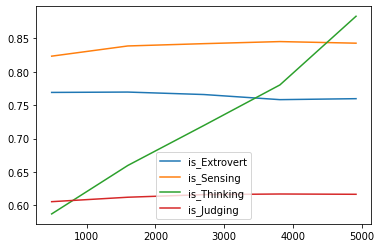

In [ ]:
# print score for Naïve Bayes Classifier
BNB = BernoulliNB()
print_cm(BNB, train_X, train_Y, 3)

In [ ]:
# print score for different dept of a Decision Tree
depth=[]
for i in range(3,40):
    print(i)
    clf = tree.DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(estimator=clf, X=train_X, y=train_Y, cv=7, n_jobs=-1,error_score='raise')
    depth.append((i, scores.mean()))
print (depth)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
[(3, 0.34734086631619837), (4, 0.38408185625136915), (5, 0.40821664572455213), (6, 0.44739436074034433), (7, 0.4734270695687521), (8, 0.4815601270376729), (9, 0.4863048610676694), (10, 0.48901665252076393), (11, 0.4887459624967531), (12, 0.484676473291274), (13, 0.4845419649341217), (14, 0.4850819291046995), (15, 0.4829129335770702), (16, 0.4827788113683117), (17, 0.4819660977156233), (18, 0.4800683070765297), (19, 0.4802025580014195), (20, 0.47667689445045547), (21, 0.4704426573496782), (22, 0.4684095860566449), (23, 0.4686797612161306), (24, 0.4720679559389237), (25, 0.4662407192451469), (26, 0.45729070049120646), (27, 0.4593260886746023), (28, 0.45471715016307046), (29, 0.4551206752345273), (30, 0.44996881208139905), (31, 0.4526824055603309), (32, 0.4478020047280009), (33, 0.45525762919817314), (34, 0.4502400169699348), (35, 0.44373393139996553), (36, 0.4460388511621908), (37, 0.4


Extrovert vs Introvert
accuracy: [0.79666531 0.79625864 0.79739626]
average precision: 0.6228840741748297
recall: 0.4887347620699594
average accuracy: 0.7967734033153205
F1 score:  0.5468051933298482 F1 weighted score 0.7887690487638039 F1 SD score:  0.004458728313308446
confusion matrix: 
[[4999  513]
 [ 947  917]]

Sensing vs Intuition
accuracy: [0.84790565 0.85319235 0.86371033]
average precision: 0.584630836568106
recall: 0.39460508426025664
average accuracy: 0.8549361136415351
F1 score:  0.4737856235042783 F1 weighted score 0.8396779648894154 F1 SD score:  0.04029076149505635
confusion matrix: 
[[5803  354]
 [ 713  506]]

Thinking vs Feeling
accuracy: [0.72387149 0.72793819 0.71643613]
average precision: 0.6939222727053066
recall: 0.705946247678915
average accuracy: 0.7227486018878857
F1 score:  0.6991860125214157 F1 weighted score 0.7242064941731581 F1 SD score:  0.007795547711585643
confusion matrix: 
[[2910 1072]
 [ 989 2405]]

Judging vs Perceiving
accuracy: [0.72590484 0.735

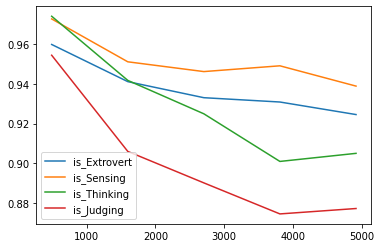

In [29]:
# print score for Decision Tree Classifier
d_tree = DecisionTreeClassifier(max_depth = 10)
print_cm(d_tree, train_X, train_Y, 3)


Extrovert vs Introvert
accuracy: [0.76575844 0.76535177 0.78844589]
average precision: 0.6194709751623076
recall: 0.2660922724299396
average accuracy: 0.7731853661232165
F1 score:  0.3718448015487054 F1 weighted score 0.7378241563024664 F1 SD score:  0.03437660232068884
confusion matrix: 
[[5207  305]
 [1368  496]]

Sensing vs Intuition
accuracy: [0.85156568 0.84383896 0.84621644]
average precision: 0.6496791322372718
recall: 0.17061844648051547
average accuracy: 0.8472070240526131
F1 score:  0.26933306011073754 F1 weighted score 0.8080216660800565 F1 SD score:  0.010447789660701659
confusion matrix: 
[[6041  116]
 [1011  208]]

Thinking vs Feeling
accuracy: [0.60593737 0.62789752 0.60537022]
average precision: 0.9141114267992556
recall: 0.1758877401926019
average accuracy: 0.6130683706411402
F1 score:  0.2940316734057626 F1 weighted score 0.5312405478375514 F1 SD score:  0.03632803079939755
confusion matrix: 
[[3925   57]
 [2797  597]]

Judging vs Perceiving
accuracy: [0.72793819 0.6

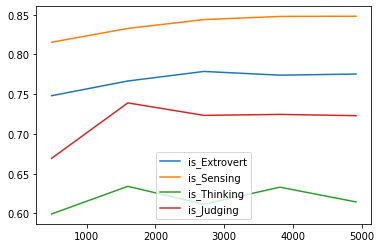

In [ ]:
# print score for KNN Classifier
knn = KNeighborsClassifier(n_neighbors=90, n_jobs=-1) 
print_cm(knn, train_X, train_Y, 3)


Extrovert vs Introvert
accuracy: [0.76413176 0.75762505 0.75956062]
average precision: 0.8650034176349966
recall: 0.06921036325948017
average accuracy: 0.760439143367004
F1 score:  0.11958226685216129 F1 weighted score 0.6741521289976439 F1 SD score:  0.015902685824921374
confusion matrix: 
[[5489   23]
 [1739  125]]

Sensing vs Intuition
accuracy: [0.83448556 0.83448556 0.8352319 ]
average precision: 0.14285714285714285
recall: 0.0016420361247947454
average accuracy: 0.8347343407748204
F1 score:  0.006488355860143409 F1 weighted score 0.7598714009721323 F1 SD score:  0.009131322436630153
confusion matrix: 
[[6157    0]
 [1216    3]]

Thinking vs Feeling
accuracy: [0.69703131 0.69581131 0.68836452]
average precision: 0.8708213461953863
recall: 0.38921251297881004
average accuracy: 0.6937357143180158
F1 score:  0.5271305936560343 F1 weighted score 0.6549906389340728 F1 SD score:  0.01155412562335973
confusion matrix: 
[[3748  234]
 [2048 1346]]

Judging vs Perceiving
accuracy: [0.61203

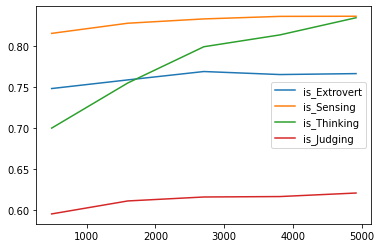

In [ ]:
# print score for Random Forest Classifier
ranForest = RandomForestClassifier(min_samples_leaf=20)
print_cm(ranForest, train_X, train_Y, 3)


Extrovert vs Introvert
accuracy: [0.81699878 0.81984547 0.81244915]
average precision: 0.6772138559025859
recall: 0.523065518568571
average accuracy: 0.8164311304250572
F1 score:  0.5902030347359077 F1 weighted score 0.8080528330248112 F1 SD score:  0.005385193089163815
confusion matrix: 
[[5047  465]
 [ 889  975]]

Sensing vs Intuition
accuracy: [0.86701911 0.86783245 0.86248983]
average precision: 0.6371190105423228
recall: 0.438871473354232
average accuracy: 0.8657804649354927
F1 score:  0.5191851573066949 F1 weighted score 0.8554243637721525 F1 SD score:  0.011066107092186165
confusion matrix: 
[[5851  306]
 [ 684  535]]

Thinking vs Feeling
accuracy: [0.77755185 0.78283855 0.77583401]
average precision: 0.7636814990908243
recall: 0.7519138863113519
average accuracy: 0.7787414713313531
F1 score:  0.7577113948391175 F1 weighted score 0.7785952895510376 F1 SD score:  0.003373101786019292
confusion matrix: 
[[3192  790]
 [ 842 2552]]

Judging vs Perceiving
accuracy: [0.76657178 0.765

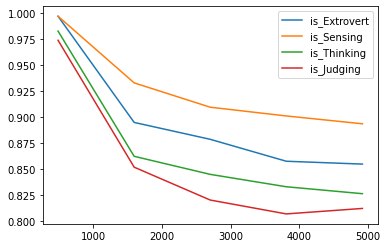

In [ ]:
# print score for AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1) 
print_cm(ada, train_X, train_Y, 3)

### Train and save model

In [ ]:
# Train model for each dimension in the MBTI personality type
ada_isExtrovert = AdaBoostClassifier(n_estimators=50, learning_rate=1)
ada_isSensing = AdaBoostClassifier(n_estimators=50, learning_rate=1)
ada_isThinking = AdaBoostClassifier(n_estimators=50, learning_rate=1)
ada_isJudging = AdaBoostClassifier(n_estimators=50, learning_rate=1)

print('start train Extrovert')
ada_isExtrovert.fit(train_X, train_Y.is_Extrovert)
print('start train Sensing')
ada_isSensing.fit(train_X, train_Y.is_Sensing)
print('start train Thinking')
ada_isThinking.fit(train_X, train_Y.is_Thinking)
print('start train Judging')
ada_isJudging.fit(train_X, train_Y.is_Judging)

start train Extrovert
start train Sensing
start train Thinking
start train Judging


AdaBoostClassifier(learning_rate=1)

In [41]:
# Save model
dump(ada_isExtrovert, 'ada_IE.joblib') 
dump(ada_isSensing, 'ada_NS.joblib') 
dump(ada_isThinking, 'ada_FT.joblib') 
dump(ada_isJudging, 'ada_PJ.joblib')

['ada_PJ.joblib']

In [ ]:
# Save the TfidfVectorizer
dump(tv, 'tv.joblib')

In [31]:
# Prediction on the test set
IE = ada_isExtrovert.predict(test_X)
NS = ada_isSensing.predict(test_X)
FT = ada_isThinking.predict(test_X)
PJ = ada_isJudging.predict(test_X)

# print the sum of the result
c1 = 0
c0 = 0
for v in IE:
  if v==0:
    c0+=1
  else:
    c1+=1
print(c0, ' ', c1)
c1 = 0
c0 = 0
for v in NS:
  if v==0:
    c0+=1
  else:
    c1+=1
print(c0, ' ', c1)
c1 = 0
c0 = 0
for v in FT:
  if v==0:
    c0+=1
  else:
    c1+=1
print(c0, ' ', c1)
c1 = 0
c0 = 0
for v in PJ:
  if v==0:
    c0+=1
  else:
    c1+=1
print(c0, ' ', c1)

1490   354
1653   191
1025   819
1157   687


In [40]:
# print the fa score with validation on the test set
IE_score = f1_score(test_Y.iloc[:,0],IE,average = 'weighted')
print(IE_score)
NS_score = f1_score(test_Y.iloc[:,1],NS,average = 'weighted')
print(NS_score)
FT_score = f1_score(test_Y.iloc[:,2],FT,average = 'weighted')
print(FT_score)
PJ_score = f1_score(test_Y.iloc[:,3],PJ,average = 'weighted')
print(PJ_score)




0.8101760048801394
0.8677324285507635
0.7828621152385189
0.7457300401988426
